In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = tf.keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13582336/13568290 [==============================] - 1s 0us/step


In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [5]:
df.shape

(420551, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [14]:
df_dates=pd.to_datetime(df['Date Time'])

KeyError: 'Date Time'

In [ ]:
df.info()

In [ ]:
df.drop('Date Time',axis=1,inplace=True)

In [15]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [23]:
temp=df['T (degC)']

In [24]:
temp

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [27]:
df.drop('T (degC)',axis=1,inplace=True)

In [28]:
df.head()

,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [29]:
df.insert(0,'T (degC)',temp)

In [30]:
df.head()

,T (degC),p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,-8.02,996.52,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,-8.41,996.57,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,-8.51,996.53,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,-8.31,996.51,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,-8.27,996.51,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


<AxesSubplot:>

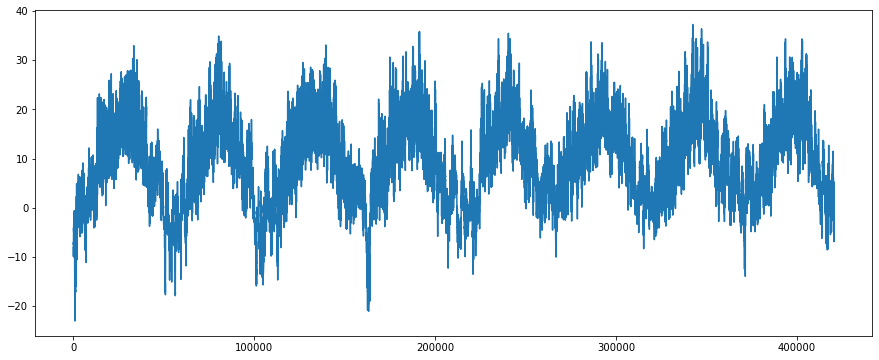

In [31]:
df['T (degC)'].plot(figsize=(15,6))

### using lstm

In [32]:
### scaling is required because lstm are sensitive to scale

from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
df_scaled=scaler.fit_transform(df)

In [35]:
df_scaled

array([[0.24863161, 0.81493857, 0.24366151, ..., 0.99726153, 0.99782988,
        0.42305556],
       [0.24216288, 0.81542998, 0.2372407 , ..., 0.99723061, 0.99780494,
        0.37805556],
       [0.24050423, 0.81503686, 0.23559434, ..., 0.99717776, 0.99771813,
        0.47666667],
       ...,
       [0.329242  , 0.84737101, 0.31955878, ..., 0.99726651, 0.99785483,
        0.59777778],
       [0.31149444, 0.84727273, 0.30194271, ..., 0.9973074 , 0.99787079,
        0.62722222],
       [0.30170841, 0.84737101, 0.29239381, ..., 0.99728147, 0.99785084,
        0.51361111]])

In [36]:
df_scaled.shape

(420551, 14)

In [37]:
training_size=int(len(df_scaled)*0.65)
test_size=len(df_scaled)-training_size

In [38]:
train_data,test_data=df_scaled[0:training_size,:],df_scaled[training_size:len(df_scaled),:]

In [39]:
training_size, test_size

(273358, 147193)

In [40]:
train_data.shape, test_data.shape

((273358, 14), (147193, 14))

In [56]:
def create_dataset(dataset,timestep=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),1:df.shape[1]]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0:1])
    return np.array(dataX), np.array(dataY)

In [57]:
timestep=30
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [58]:
X_train.shape, y_train.shape

((273327, 30, 13), (273327, 1))

In [61]:
X_test.shape, y_test.shape

((147162, 30, 13), (147162, 1))

In [62]:
# X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],14)
#X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],14)

In [63]:
X_train.shape, X_test.shape

((273327, 30, 13), (147162, 30, 13))

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()

In [66]:
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 50)            12800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 53,251
Trainable params: 53,251
Non-trainable params: 0
_________________________________________________________________


In [68]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [70]:
history=model.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1168e-05 - val_loss: 1.6639e-05
Epoch 2/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1085e-05 - val_loss: 1.3242e-05
Epoch 3/100
4271/4271 [==============================] - 40s 9ms/step - loss: 1.1087e-05 - val_loss: 1.2507e-05
Epoch 4/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1114e-05 - val_loss: 1.1903e-05
Epoch 5/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1052e-05 - val_loss: 1.3519e-05
Epoch 6/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1049e-05 - val_loss: 1.3018e-05
Epoch 7/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1071e-05 - val_loss: 1.2676e-05
Epoch 8/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1079e-05 - val_loss: 1.5800e-05
Epoch 9/100
4271/4271 [==============================] - 39s 9ms/step - loss: 1.1043e-05 - val_loss: 1.2

In [75]:
model.save('weather_lstm_model.hdf5')

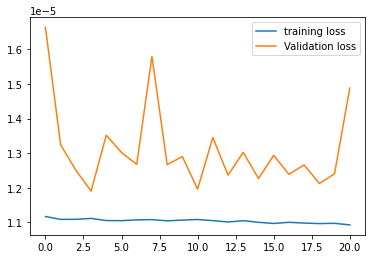

In [72]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model=load_model('weather_lstm_model.hdf5')

In [78]:
X_train.shape

(273327, 30, 13)

In [ ]:
#X_train[:len(X_train)][:30]

In [ ]:
# temp=np.empty_like(X_train)
# temp[:,:]=np.nan
# temp[0:len(X_train)-1,:1][0][0]=X_train

In [117]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [118]:
train_predict=np.repeat(train_predict,14,axis=-1)
test_predict=np.repeat(test_predict,14,axis=-1)

In [119]:
train_predict.shape, test_predict.shape

((273327, 14), (147162, 14))

In [120]:
train_predict=scaler.inverse_transform(train_predict)[:,0]
test_predict=scaler.inverse_transform(test_predict)[:,0]

In [121]:
train_predict.shape, test_predict.shape

((273327,), (147162,))

In [98]:
#df.head()

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [123]:
sqrt(mean_squared_error(y_train,train_predict))

11.85780849950362

In [124]:
sqrt(mean_squared_error(y_test,test_predict))

12.886308840754504

In [125]:
df_transformed=scaler.inverse_transform(df_scaled)

In [126]:
df_transformed.shape

(420551, 14)

In [140]:
df_transformed

array([[-8.0200e+00,  9.9652e+02,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [-8.4100e+00,  9.9657e+02,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [-8.5100e+00,  9.9653e+02,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [-3.1600e+00,  9.9982e+02,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [-4.2300e+00,  9.9981e+02,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [-4.8200e+00,  9.9982e+02,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

In [141]:
df_transformed[:len(df_transformed),0]

420551

In [146]:
len(test_predict)

147162

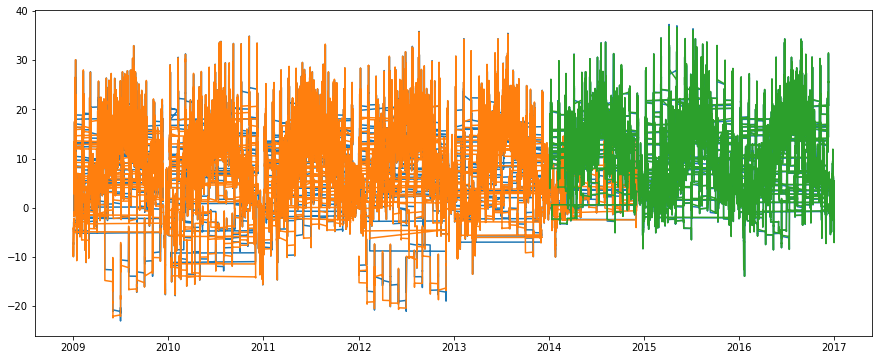

In [188]:
##plotting
look_back=30
 #shifting test data
testPredictPlot=np.empty_like(df_scaled)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_transformed)-1,0]=test_predict

plt.figure(figsize=(15,6))
plt.plot(df_dates,df_transformed[:len(df_transformed),0],label='original')
plt.plot(df_dates[:len(train_predict)],train_predict,label='train')
plt.plot(df_dates,testPredictPlot,label='test')

plt.show()


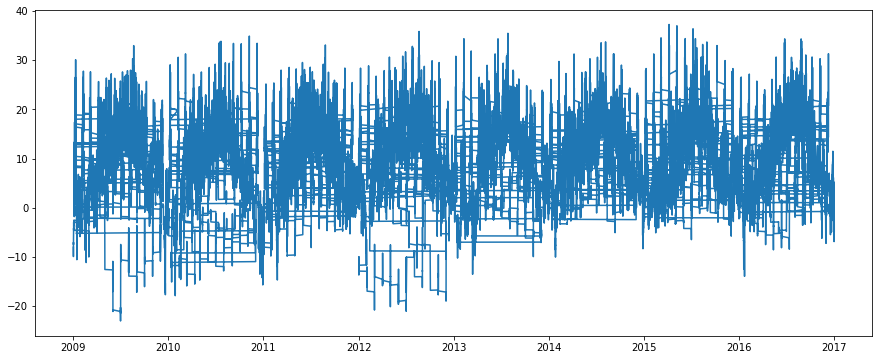

In [185]:
plt.figure(figsize=(15,6))
plt.plot(df_dates,df_transformed[:len(df_transformed),0],label='original')